<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_0_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-0.8'

In [5]:
os.listdir(base_path)

['data_multi_delta_-0.8_n20.csv',
 'data_multi_delta_-0.8_n30.csv',
 'data_multi_delta_-0.8_n60.csv',
 'data_multi_delta_-0.8_n120.csv',
 'data_multi_delta_-0.8_n250.csv']

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.8_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,0.134782,214.621521,214.477932,0.143589
1,0.0,1.0,88.215495,94.604408,36.752253,0.042328,229.614484,229.552057,0.062427
2,0.0,2.0,75.723322,35.232029,46.417423,-0.207032,167.165742,167.387419,-0.221678
3,0.0,3.0,38.055184,66.641168,96.212257,-0.481988,210.426621,210.913184,-0.486563
4,0.0,4.0,68.821230,68.543753,46.272811,-0.276782,193.361013,193.639067,-0.278053
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-0.327613,178.429826,178.789562,-0.359736
249996,999.0,246.0,32.379447,24.201317,94.176224,-0.182911,160.574077,160.715051,-0.140974
249997,999.0,247.0,73.636953,77.707721,80.827540,0.199599,242.371812,242.138647,0.233166
249998,999.0,248.0,96.730468,97.527144,33.411083,0.241300,237.909995,237.685205,0.224790


In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,0.134782,214.621521,214.477932,0.143589
1,0.0,1.0,88.215495,94.604408,36.752253,0.042328,229.614484,229.552057,0.062427
2,0.0,2.0,75.723322,35.232029,46.417423,-0.207032,167.165742,167.387419,-0.221678
3,0.0,3.0,38.055184,66.641168,96.212257,-0.481988,210.426621,210.913184,-0.486563
4,0.0,4.0,68.821230,68.543753,46.272811,-0.276782,193.361013,193.639067,-0.278053
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-0.327613,178.429826,178.789562,-0.359736
249996,999.0,246.0,32.379447,24.201317,94.176224,-0.182911,160.574077,160.715051,-0.140974
249997,999.0,247.0,73.636953,77.707721,80.827540,0.199599,242.371812,242.138647,0.233166
249998,999.0,248.0,96.730468,97.527144,33.411083,0.241300,237.909995,237.685205,0.224790


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    57.585513  99.226585  47.674641  0.134782  214.621521   
      1.0    88.215495  94.604408  36.752253  0.042328  229.614484   
      2.0    75.723322  35.232029  46.417423 -0.207032  167.165742   
      3.0    38.055184  66.641168  96.212257 -0.481988  210.426621   
      4.0    68.821230  68.543753  46.272811 -0.276782  193.361013   
...                ...        ...        ...       ...         ...   
999.0 245.0  82.142416  53.368686  33.246337 -0.327613  178.429826   
      246.0  32.379447  24.201317  94.176224 -0.182911  160.574077   
      247.0  73.636953  77.707721  80.827540  0.199599  242.371812   
      248.0  96.730468  97.527144  33.411083  0.241300  237.909995   
      249.0  92.431783  65.077315  73.380665  0.072511  240.962273   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.477932  0.143589  
      1.0    229.552057  0.062427  
      2.0    167.387419 -0.221678  
      3.0    210.913184 -0.486563  
      4.0    193.639067 -0.278053  
...                 ...       ...  
999.0 245.0  178.789562 -0.359736  
      246.0  160.715051 -0.140974  
      247.0  242.138647  0.233166  
      248.0  237.685205  0.224790  
      249.0  240.881448  0.080825  

[250000 rows x 7 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    57.585513  99.226585  47.674641  0.134782  214.621521   
      1.0    88.215495  94.604408  36.752253  0.042328  229.614484   
      2.0    75.723322  35.232029  46.417423 -0.207032  167.165742   
      3.0    38.055184  66.641168  96.212257 -0.481988  210.426621   
      4.0    68.821230  68.543753  46.272811 -0.276782  193.361013   
...                ...        ...        ...       ...         ...   
999.0 245.0  82.142416  53.368686  33.246337 -0.327613  178.429826   
      246.0  32.379447  24.201317  94.176224 -0.182911  160.574077   
      247.0  73.636953  77.707721  80.827540  0.199599  242.371812   
      248.0  96.730468  97.527144  33.411083  0.241300  237.909995   
      249.0  92.431783  65.077315  73.380665  0.072511  240.962273   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.477932  0.143589  
      1.0    229.552057  0.062427  
      2.0    167.387419 -0.221678  
      3.0    210.913184 -0.486563  
      4.0    193.639067 -0.278053  
...                 ...       ...  
999.0 245.0  178.789562 -0.359736  
      246.0  160.715051 -0.140974  
      247.0  242.138647  0.233166  
      248.0  237.685205  0.224790  
      249.0  240.881448  0.080825  

[250000 rows x 7 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,57.585513,99.226585,47.674641,0.134782,214.621521,214.477932,0.143589
1,0.0,1.0,88.215495,94.604408,36.752253,0.042328,229.614484,229.552057,0.062427
2,0.0,2.0,75.723322,35.232029,46.417423,-0.207032,167.165742,167.387419,-0.221678
3,0.0,3.0,38.055184,66.641168,96.212257,-0.481988,210.426621,210.913184,-0.486563
4,0.0,4.0,68.821230,68.543753,46.272811,-0.276782,193.361013,193.639067,-0.278053
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,82.142416,53.368686,33.246337,-0.327613,178.429826,178.789562,-0.359736
249996,999.0,246.0,32.379447,24.201317,94.176224,-0.182911,160.574077,160.715051,-0.140974
249997,999.0,247.0,73.636953,77.707721,80.827540,0.199599,242.371812,242.138647,0.233166
249998,999.0,248.0,96.730468,97.527144,33.411083,0.241300,237.909995,237.685205,0.224790


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    57.585513  99.226585  47.674641  0.134782  214.621521   
      1.0    88.215495  94.604408  36.752253  0.042328  229.614484   
      2.0    75.723322  35.232029  46.417423 -0.207032  167.165742   
      3.0    38.055184  66.641168  96.212257 -0.481988  210.426621   
      4.0    68.821230  68.543753  46.272811 -0.276782  193.361013   
...                ...        ...        ...       ...         ...   
999.0 245.0  82.142416  53.368686  33.246337 -0.327613  178.429826   
      246.0  32.379447  24.201317  94.176224 -0.182911  160.574077   
      247.0  73.636953  77.707721  80.827540  0.199599  242.371812   
      248.0  96.730468  97.527144  33.411083  0.241300  237.909995   
      249.0  92.431783  65.077315  73.380665  0.072511  240.962273   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    214.477932  0.143589  
      1.0    229.552057  0.062427  
      2.0    167.387419 -0.221678  
      3.0    210.913184 -0.486563  
      4.0    193.639067 -0.278053  
...                 ...       ...  
999.0 245.0  178.789562 -0.359736  
      246.0  160.715051 -0.140974  
      247.0  242.138647  0.233166  
      248.0  237.685205  0.224790  
      249.0  240.881448  0.080825  

[250000 rows x 7 columns]

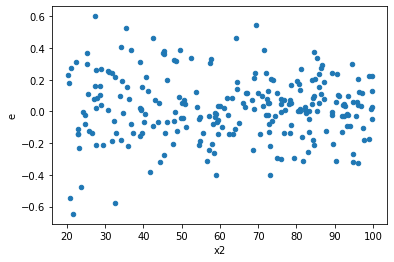

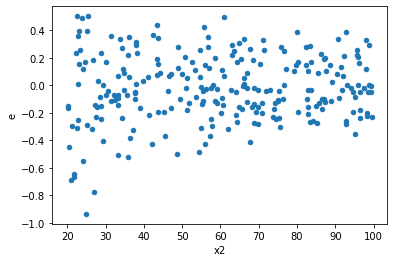

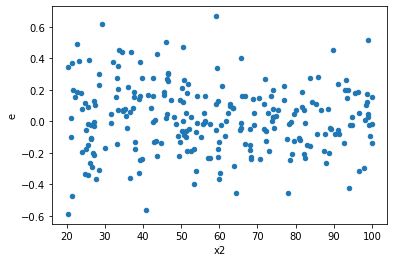

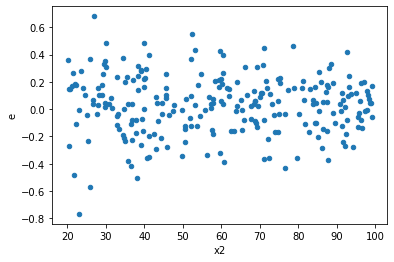

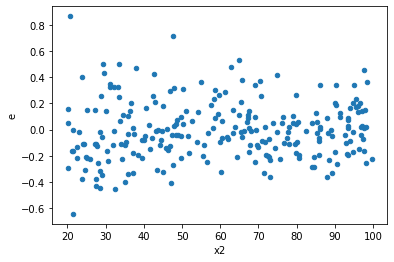

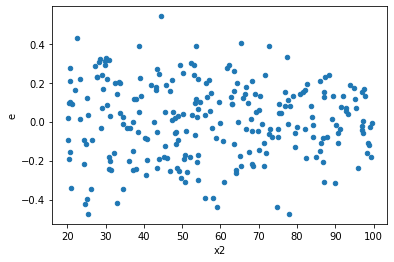

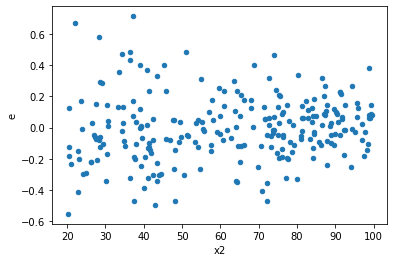

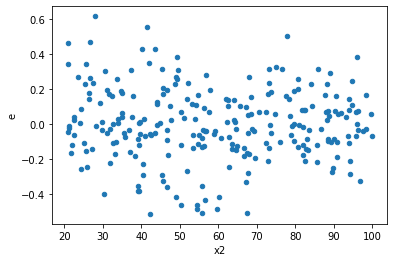

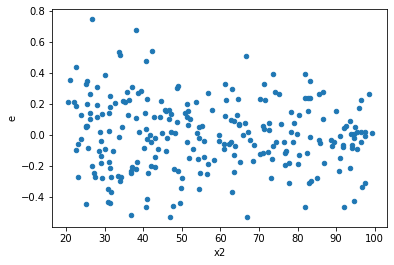

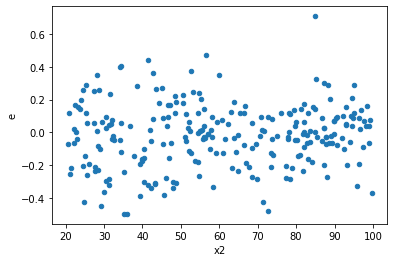

In [13]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
21.0,97.0,97.0,3.487390369743376,4.622047731652267,0.0359524780385915,0.04764997661497183,1.3253600089491522,0.16718919710518199,0.916405401447409,0.08359459855259099,Reject005=1 : Homoscedasticity
95.0,97.0,97.0,4.5752704162500395,4.698290320553128,0.047167736250000404,0.04843598268611472,1.026888007289396,0.8963124291057012,0.5518437854471494,0.4481562145528506,Reject005=1 : Homoscedasticity
99.0,97.0,97.0,3.8238877017415227,4.011528941510345,0.03942152269836621,0.04135596846917881,1.0490708029117497,0.813987172920196,0.593006413539902,0.406993586460098,Reject005=1 : Homoscedasticity
118.0,97.0,97.0,3.280033501569441,3.872535051085426,0.03381477836669527,0.03992304176376728,1.180638871289724,0.4149818092031543,0.7925090953984228,0.20749090460157715,Reject005=1 : Homoscedasticity
127.0,97.0,97.0,3.713105983337582,3.9735677270460745,0.038279443127191566,0.04096461574274304,1.0701465955664353,0.7391616788315534,0.6304191605842233,0.3695808394157767,Reject005=1 : Homoscedasticity
148.0,97.0,97.0,4.023038504242742,5.088412793493805,0.04147462375507982,0.0524578638504516,1.2648183178280563,0.2490780519151532,0.8754609740424234,0.1245390259575766,Reject005=1 : Homoscedasticity
183.0,97.0,97.0,4.50668009463047,4.8919928508927555,0.04646061953227289,0.05043291598858511,1.085498137913399,0.6870225281129332,0.6564887359435334,0.3435112640564666,Reject005=1 : Homoscedasticity
200.0,97.0,97.0,4.213517834170231,4.394065217139763,0.04343832818732197,0.04529964141381199,1.0428495594596403,0.8367326760664229,0.5816336619667886,0.41836633803321144,Reject005=1 : Homoscedasticity
307.0,97.0,97.0,4.531382868768269,4.569128671930728,0.04671528730688937,0.04710441929825493,1.008329864029503,0.9674994120825549,0.5162502939587226,0.4837497060412774,Reject005=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,4.700065314994019,3.258279485365513,0.04845428159787648,0.033590510158407354,0.6932413204920876,0.07272187889777139,Reject005=1 : Homoscedasticity
1.0,97.0,97.0,4.767837206316516,2.9873264145891523,0.049152960889860986,0.030797179531846932,0.6265579727914135,0.022253643902730238,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,4.96940212570593,2.9207908677178556,0.051230949749545666,0.030111246058946963,0.5877549841678272,0.009452306385672841,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,4.60114938480881,3.0768638062981295,0.047434529740297014,0.03172024542575391,0.6687163464974049,0.04885253823680142,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,5.105848265594367,3.5710313152523265,0.05263761098550894,0.03681475582734357,0.6994002033541876,0.07986351378011917,Reject005=1 : Homoscedasticity
5.0,97.0,97.0,4.9521765532181,2.303890209598431,0.05105336652802165,0.02375144545977764,0.46522780131925656,0.00020374659418713278,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,4.27771362921911,3.041022635722828,0.0441001405074135,0.03135074882188482,0.71089906882756,0.09452756166123027,Reject005=1 : Homoscedasticity
7.0,97.0,97.0,4.967608658760842,4.41931195956013,0.05121246039959631,0.045559917108867316,0.889625625353209,0.565772394392917,Reject005=1 : Homoscedasticity
8.0,97.0,97.0,5.1397145710389465,3.9146129665522555,0.05298674815504068,0.040356834706724284,0.7616401479977423,0.18176971106221534,Reject005=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    524
Reject005=1 : Homoscedasticity      476
Name: Result_test, dtype: int64